**Forecasting (Airlines data)**



In [398]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

**EDA**

In [399]:
airlines=pd.read_excel('Airlines+Data.xlsx')
airlines.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [400]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [401]:
airlines.shape

(96, 2)

In [402]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [403]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


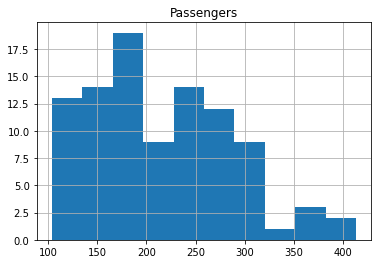

In [404]:
data =pd.read_excel('/content/Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
data.hist()
pyplot.show()

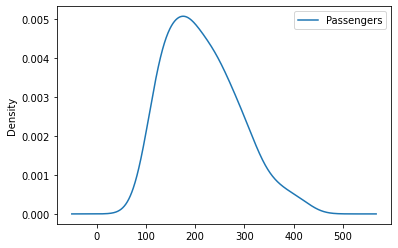

In [405]:
data = pd.read_excel('/content/Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
data.plot(kind='kde')
pyplot.show()

Box and Whisker Plots by Interval

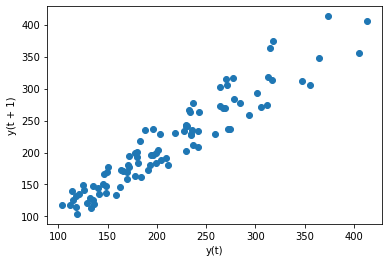

In [406]:
from pandas.plotting import lag_plot
data =pd.read_excel('/content/Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
lag_plot(data)
pyplot.show()

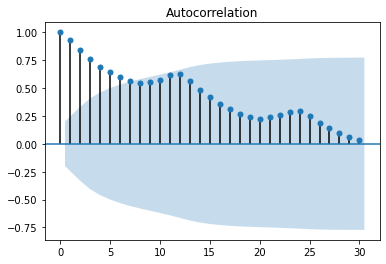

In [407]:
from statsmodels.graphics.tsaplots import plot_acf
data =pd.read_excel('/content/Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
plot_acf(data,lags=30)
pyplot.show()

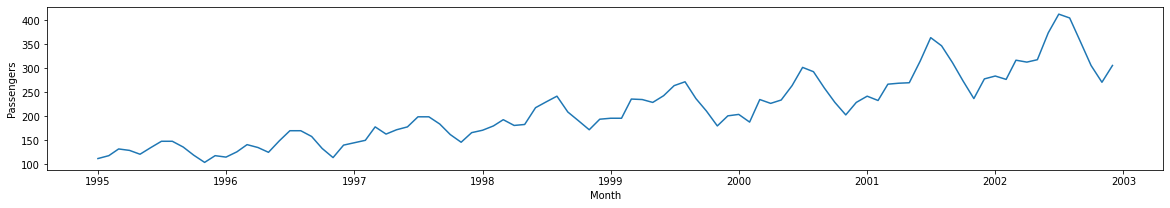

In [408]:
#Line plot
plt.figure(figsize=(20,3))
sns.lineplot(x="Month",y="Passengers",data=airlines);

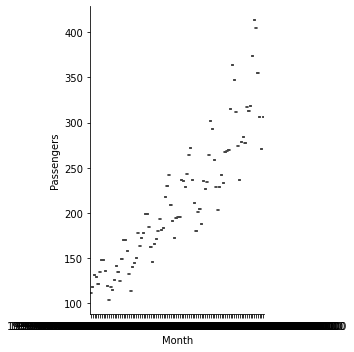

In [409]:
sns.factorplot("Month","Passengers",data=airlines,kind="box");

In [410]:
df=pd.DataFrame(pd.get_dummies(airlines['Month']))
df.head()

,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,1995-10-01,...,2002-03-01,2002-04-01,2002-05-01,2002-06-01,2002-07-01,2002-08-01,2002-09-01,2002-10-01,2002-11-01,2002-12-01
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [411]:
df

,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,1995-10-01,...,2002-03-01,2002-04-01,2002-05-01,2002-06-01,2002-07-01,2002-08-01,2002-09-01,2002-10-01,2002-11-01,2002-12-01
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [412]:
df.head()

,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,1995-10-01,...,2002-03-01,2002-04-01,2002-05-01,2002-06-01,2002-07-01,2002-08-01,2002-09-01,2002-10-01,2002-11-01,2002-12-01
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**This is airlines data of no.of passengers boarding every month from january 1995 to december 2002.**

In [413]:
# Parse strings to datetime type

from datetime import datetime
airlines['Month'] = pd.to_datetime(airlines['Month'], infer_datetime_format=True)
indexedDataset = airlines.set_index(['Month'])

In [414]:
indexedDataset['1995-03']
indexedDataset['1995-03':'1995-06']
indexedDataset['1995']

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


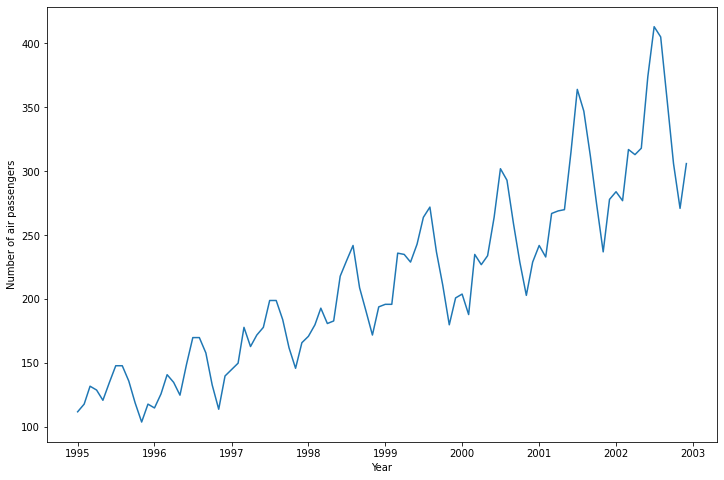

In [415]:
plt.figure(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

<Figure size 576x864 with 0 Axes>

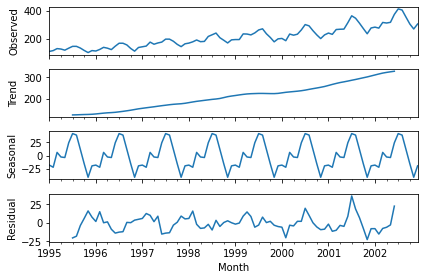

In [416]:
plt.figure(figsize=(8,12))
decompose_ts_add = seasonal_decompose(indexedDataset.Passengers)
decompose_ts_add.plot()
plt.show();

In [417]:
# Splitting data to train and test (validation)

In [418]:

Train=indexedDataset.head(90)
Test=indexedDataset.tail(6)

In [419]:
Train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-02-01,277
2002-03-01,317
2002-04-01,313


In [420]:
Test

,Passengers
Month,
2002-07-01,413
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


**Data Driven Models**

In [421]:
# Moving Average

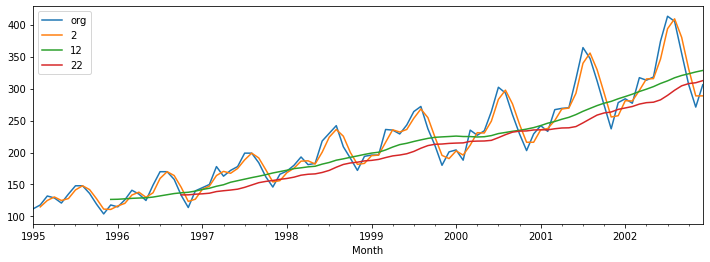

In [422]:
plt.figure(figsize=(12,4))
indexedDataset.Passengers.plot(label="org")
for i in range(2,24,10):
    indexedDataset["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

**ACF plots and PACF plots**

In [423]:
# ACF plots and PACF plots

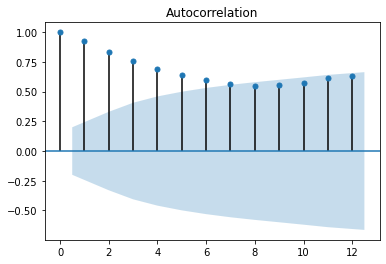

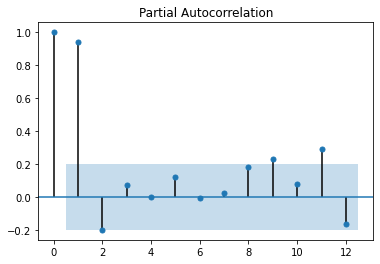

In [424]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(indexedDataset.Passengers,lags=12)
tsa_plots.plot_pacf(indexedDataset.Passengers,lags=12)
plt.show()

In [425]:
from statsmodels.tsa.stattools import acf, pacf

Acf

<BarContainer object of 20 artists>

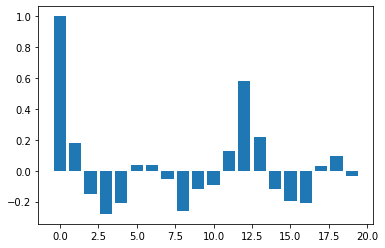

In [426]:
acf_vals = acf(first_diff)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])

pacf

<BarContainer object of 15 artists>

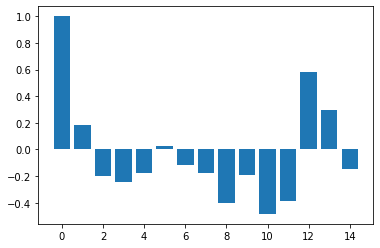

In [427]:
pacf_vals = pacf(first_diff)
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])

**Evaluation Metric MAPE**

In [428]:
# MAPE 
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [429]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

13.161170526223493

In [430]:
# Holt method 
hw_model = Holt(Train['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

27.619306276788702

In [431]:
#Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

2.3842203102653334

In [432]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.8309640009827923

In [433]:
# Final Modelbuilding with train+test data

In [434]:
hwe_model_add_add_final = ExponentialSmoothing(indexedDataset["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 

In [435]:
#Forecasting for next 10 time periods
hwe_model_add_add_final.forecast(15)

2003-01-01    320.924021
2003-02-01    313.638039
2003-03-01    352.925020
2003-04-01    350.350301
2003-05-01    356.060923
2003-06-01    408.899129
2003-07-01    446.143114
2003-08-01    433.358026
2003-09-01    382.762460
2003-10-01    336.170254
2003-11-01    303.315050
2003-12-01    349.662471
2004-01-01    356.109876
2004-02-01    348.823895
2004-03-01    388.110875
Freq: MS, dtype: float64

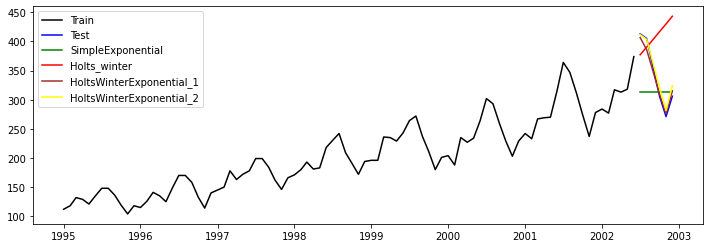

In [436]:
# Visualization of Forecasted values for Test data set using different methods 
plt.figure(figsize=(12,4))
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(Test.index, Test["Passengers"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best');

**ARIMA Hyperparameters**

In [437]:
# ARIMA model

In [438]:
# grid search ARIMA parameters for a time series

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [439]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [440]:
# load dataset
train =pd.read_excel('/content/Airlines+Data.xlsx', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [441]:
from statsmodels.tsa.arima_model import ARIMA

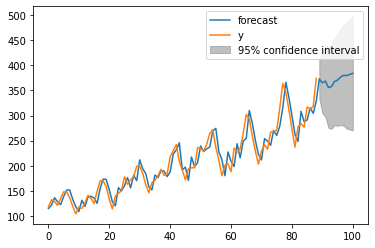

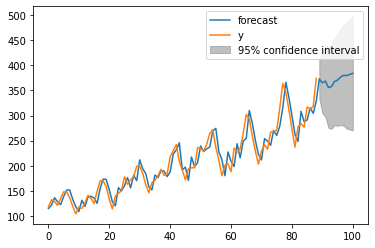

In [442]:
X = Train.Passengers.values
X = X.astype('float32')
model = ARIMA(X, order=(5,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=6)[0]
model_fit.plot_predict(1, 101)

#### Combine train and test data and build final model

In [443]:
# Error with test data
from sklearn.metrics import mean_squared_error
from math import sqrt
y=Test.Passengers.values
y=y.astype('float32')
rmse = sqrt(mean_squared_error(y, forecast[0:6]))
rmse

53.506893319485805

In [444]:
# Combine train and test data and build final model
# prepare data
final = indexedDataset.Passengers.values
final = final.astype('float32')
model_final = ARIMA(final, order=(5,1,0))
model_fit = model_final.fit()

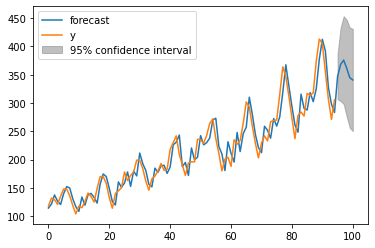

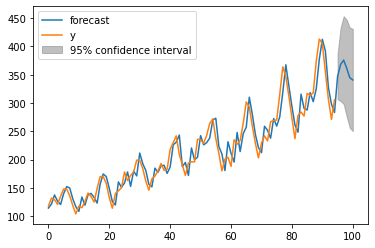

In [445]:
forecast_final=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,101)

In [446]:
forecast_final

array([346.95349551, 368.15875064, 375.80159785, 361.6136709 ,
       344.83396884, 340.75479868, 345.75088787, 356.88527293,
       367.34618987, 371.27585474])

In [447]:
forecast

array([373.14067524, 365.2384339 , 368.62682063, 355.80210051,
       357.74461709, 367.78680958])

#### Build Model based on the optimized values

In [448]:
# save finalized model to file
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [449]:
# load data
train = pd.read_excel('/content/Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

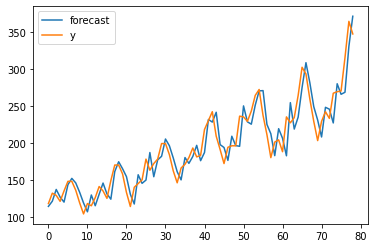

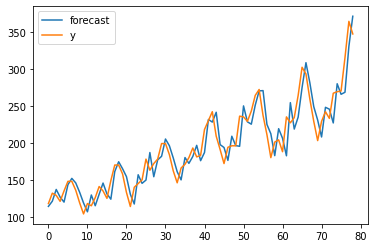

In [450]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

**Fit the SARIMA Model**

In [451]:
# SARIMAX MODEL

In [452]:
ts = airlines['Passengers']
ts.tail()

91    405
92    355
93    306
94    271
95    306
Name: Passengers, dtype: int64

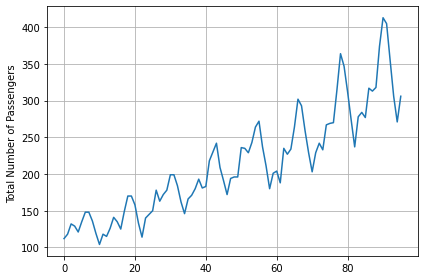

In [453]:
import matplotlib.pylab as plt
plt.plot(ts)
plt.ylabel('Total Number of Passengers ')
plt.grid()
plt.tight_layout()
plt.savefig('Airlines_Passengers.png')
plt.show()

In [454]:
from statsmodels.tsa.stattools import adfuller

def Airlines_Passengers(timeseries):
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non Passengers
        print("X is Passengers")
        return True
    else:
        print("X is not Passengerss")
        return False

In [455]:
ts_diff = pd.Series(ts)
d = 0
while Airlines_Passengers(ts_diff) is False:
    ts_diff = ts_diff.diff().dropna()
    d = d + 1

X is not Passengerss
X is not Passengerss
X is Passengers


**Build the SARIMA model**

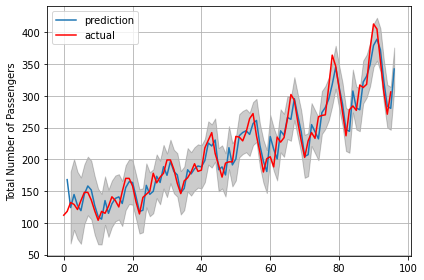

In [456]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 9
q = 1
model = SARIMAX(ts, order=(p,d,q))
model_fit = model.fit(disp=1,solver='powell')
    
fcast = model_fit.get_prediction(start=1, end=len(ts))
ts_p = fcast.predicted_mean
ts_ci = fcast.conf_int()


plt.show()
plt.plot(ts_p,label='prediction')
plt.plot(ts,color='red',label='actual')
plt.fill_between(ts_ci.index[1:],
                ts_ci.iloc[1:, 0],
                ts_ci.iloc[1:, 1], color='k', alpha=.2)

plt.ylabel('Total Number of Passengers')
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig('Passengers.png')
plt.show()

**Calculate some statistics**

In [457]:
from scipy import stats
stats.pearsonr(ts_p[1:], ts[1:]) 

(0.9774422551022851, 1.328321474953254e-64)

In [458]:
residuals = ts - ts_p
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ts-np.mean(ts))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9359717734199418

In [459]:
#summary of the model
print(model_fit.summary())

                           Statespace Model Results                           
Dep. Variable:             Passengers   No. Observations:                   96
Model:               SARIMAX(9, 2, 1)   Log Likelihood                -405.646
Date:                Sat, 19 Mar 2022   AIC                            833.292
Time:                        05:59:31   BIC                            861.268
Sample:                             0   HQIC                           844.592
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0471      0.120      0.393      0.695      -0.188       0.282
ar.L2         -0.3335      0.115     -2.895      0.004      -0.559      -0.108
ar.L3         -0.1380      0.113     -1.223      0.2

Text(0, 0.5, 'Error')

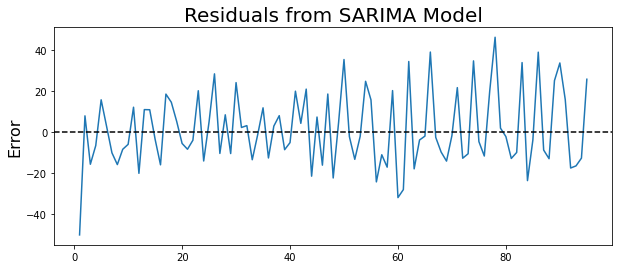

In [460]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [461]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [462]:
#read data
airlines_passengers =pd.read_excel('/content/Airlines+Data.xlsx', parse_dates=[0], index_col=0, squeeze=True)

In [463]:
# load and plot a time series
from matplotlib import pyplot

In [464]:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_airlines_passengers = airlines_passengers[start_date:end_date]

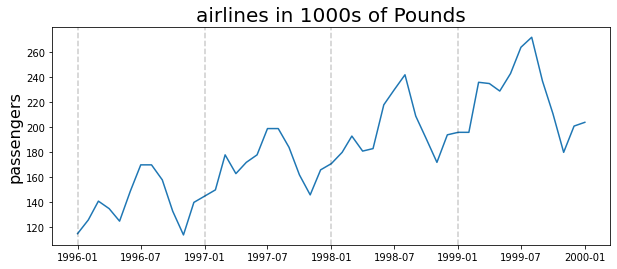

In [465]:
plt.figure(figsize=(10,4))
plt.plot(lim_airlines_passengers)
plt.title('airlines in 1000s of Pounds', fontsize=20)
plt.ylabel('passengers', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [466]:
first_diff = lim_airlines_passengers.diff()[1:]

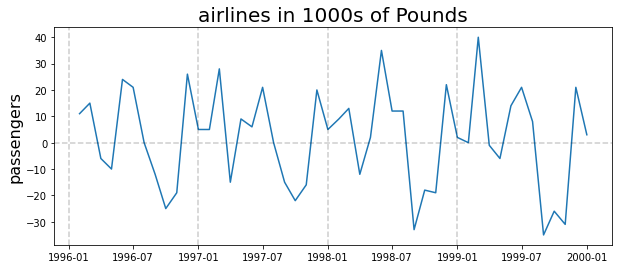

In [467]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('airlines in 1000s of Pounds', fontsize=20)
plt.ylabel('passengers', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [468]:
from datetime import timedelta
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

train_data = lim_airlines_passengers[:train_end]
test_data = lim_airlines_passengers[train_end + timedelta(days=1):test_end]

In [469]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [470]:
#fit the model
from time import time
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.3236398696899414


In [471]:
#summary of the model
print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         Passengers   No. Observations:                   43
Model:             SARIMAX(0, 1, 0)x(1, 0, 1, 12)   Log Likelihood                -162.085
Date:                            Sat, 19 Mar 2022   AIC                            330.171
Time:                                    05:59:33   BIC                            335.384
Sample:                                01-01-1996   HQIC                           332.082
                                     - 07-01-1999                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9996      0.058     17.367      0.000       0.887       1.112
ma.S.L12      -0.9475      4.119   

In [472]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

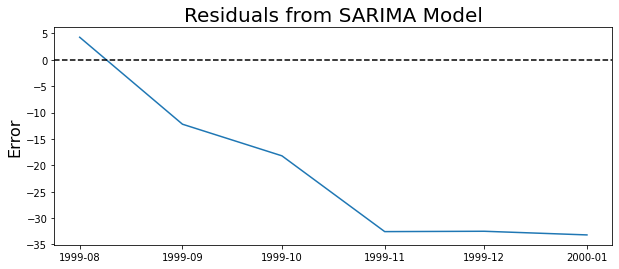

In [473]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

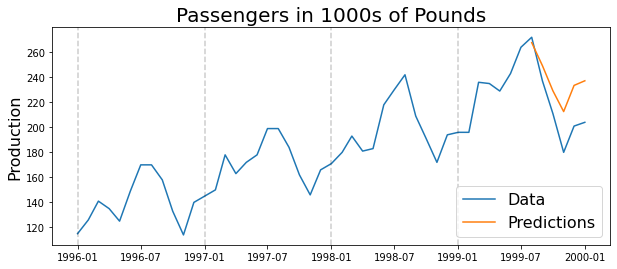

In [474]:
plt.figure(figsize=(10,4))

plt.plot(lim_airlines_passengers)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Passengers in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [475]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.1098


In [476]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 24.89523082439384


**Using the Rolling Forecast Origin**

In [477]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_airlines_passengers[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

In [478]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

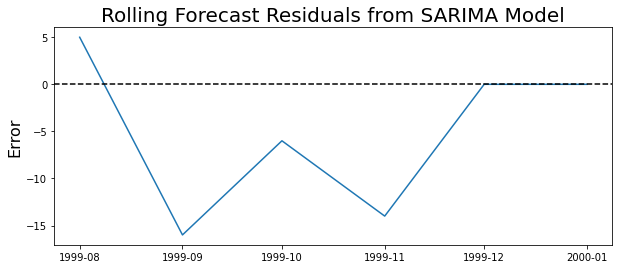

In [479]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

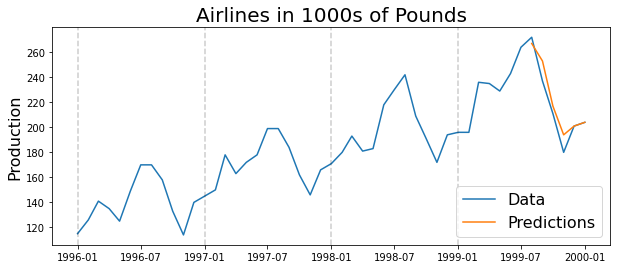

In [480]:
plt.figure(figsize=(10,4))

plt.plot(lim_airlines_passengers)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Airlines in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [481]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.032


In [482]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 9.246621004453464


In [483]:
#get the predictions and residuals
predictions = model_fit.forecast(len(airlines))


**Predict for new time period**

In [484]:
predict_data = pd.read_excel('/content/Airlines+Data.xlsx')

In [485]:
predict_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
